# Task SESI 4 *Introduction Python for Spatial Data*

## 1 Setup & Import Library ⚙️📥
##### 1. pandas  *manipulasi data tabular.*
##### 2. geopandas *membaca dan mengolah data spasial (GeoJSON)*.
##### 3. folium *membuat peta interaktif berbasis leaflet.*
##### 4. matplotlib.pyplot *visualisasi grafik.*
##### 5. seaborn *visualisasi statistik.*
##### 6. numpy *operasi numerik.*
##### 7. shapely.geometry *membuat dan memanipulasi objek geometri polygon/titik*

In [24]:
import pandas as pd 
import geopandas as gpd 
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import Polygon, Point

## 2 Mengload data GeoJSON 📂📂🔎

In [25]:
dfSpatialFood = gpd.read_file('data_point_pluvial_flood_dataset.geojson')
dfSpatialFood.head()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall,SUSCEP,geometry
0,3.909444,7.443056,46.686142,-3.888000e+09,45.000000,-3.250368,147.0,228.8528,101.515616,Very_High,POINT (3.90944 7.44306)
1,3.908611,7.442778,52.151768,1.296000e+09,60.945396,-4.313832,61.0,229.6781,80.409863,Very_High,POINT (3.90861 7.44278)
2,3.908889,7.442778,66.484085,0.000000e+00,67.619865,-8.327622,1.0,230.5920,78.986849,Very_High,POINT (3.90889 7.44278)
3,3.909167,7.442778,58.007183,-2.592000e+09,38.659809,-4.707937,51.0,235.4210,81.953151,Very_High,POINT (3.90917 7.44278)
4,3.909444,7.442778,60.503792,-1.296000e+09,351.869904,-5.985817,15.0,234.4346,85.866027,Very_High,POINT (3.90944 7.44278)


## 3 Eksplorasi Struktur Data 🔍📋📋

In [26]:
dfSpatialFood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 144401 entries, 0 to 144400
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   X           144401 non-null  float64 
 1   Y           144401 non-null  float64 
 2   Slope       144119 non-null  float64 
 3   Curvature   144401 non-null  float64 
 4   Aspect      144401 non-null  float64 
 5   TWI         144401 non-null  float64 
 6   FA          144401 non-null  float64 
 7   Drainage    144401 non-null  float64 
 8   Rainfall    144401 non-null  float64 
 9   SUSCEP      144401 non-null  object  
 10  geometry    144401 non-null  geometry
dtypes: float64(9), geometry(1), object(1)
memory usage: 12.1+ MB


In [27]:
dfSpatialFood.describe()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall
count,144401.000000,144401.000000,1.441190e+05,1.444010e+05,1.444010e+05,1.444010e+05,1.444010e+05,144401.000000,144401.000000
mean,3.891534,7.374551,-2.502788e+35,-8.342043e+35,-1.673122e+35,-2.120858e+34,-2.120858e+35,219.714542,74.786932
std,0.027887,0.032459,9.225150e+36,1.682769e+37,7.543591e+36,2.686356e+36,8.492619e+36,7.057921,8.891617
min,3.831111,7.311389,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,203.729300,59.541096
25%,3.868889,7.348333,5.105756e+01,-2.592000e+09,1.013099e+02,-8.654586e+00,0.000000e+00,214.286900,68.140822
50%,3.891667,7.374167,6.198023e+01,0.000000e+00,1.894623e+02,-8.006991e+00,1.000000e+00,220.631300,73.873425
75%,3.913611,7.400278,6.916712e+01,2.592000e+09,2.700000e+02,-6.709276e+00,6.000000e+00,224.191400,81.329315
max,3.954444,7.443056,8.657541e+01,3.888000e+10,3.591449e+02,1.168344e+01,4.579360e+05,235.421000,101.515616


## 4️ Visualisasi Distribusi Parameter 🔍📊📊
* menurut saya Data Rainfall dan slope tidak terlalu berkolerasi walaupun ada tapi kecil yang saya perkirakan dari melihat kedua grafiknya
* Awalnya kemiringan pertumbuhannya tidak sebanding lurus dengan jumlah wilaya tetapi ketika kemiringannya 30 - 69 mulai sebanding lurus tapi secara mendadak semakin tinggi kemiringannya jumlah wilaya mulai berkurang
* Distribusi data pada rainfall tidak beraturan dengan jumlah wilayanya tapi pada curah hujan 91 - 99 tidak ada satupun wilaya terkandung

### Hisogram data Kemiringan/Slope

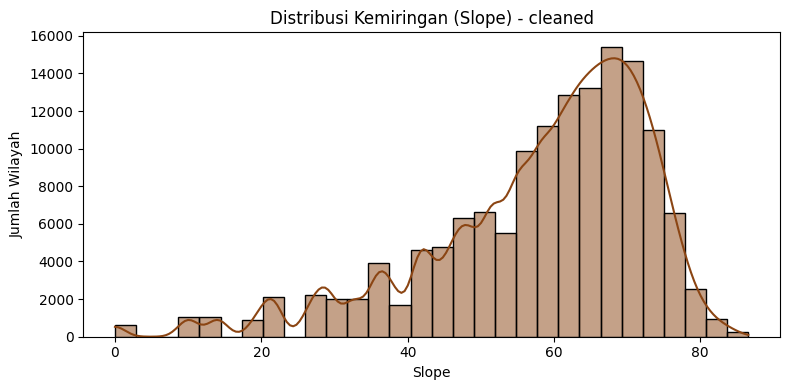

In [28]:
# Histogram Slope (dibersihkan dari nilai NoData/outlier), menghasilkan outpun nan
s_raw = pd.to_numeric(dfSpatialFood['Slope'], errors='coerce')

# Buang nilai ekstrem khas NoData raster float32 kemudian jadikan nan
s_clean = s_raw.copy()
s_clean[(s_clean.abs() > 1e10)] = np.nan
# Mengunakan s_clean untuk data slope yang dipunya kemudian di drop baris yang nan
dfSpatialFood['Slope'] = s_clean
dfSpatialFood = dfSpatialFood.dropna()

# Slope seharusnya 0–90 derajat, clip supaya outlier kecil tidak mengganggu
dfSpatialFood['Slope'] = dfSpatialFood['Slope'].clip(lower=0, upper=90)

plt.figure(figsize=(8,4))
sns.histplot(dfSpatialFood['Slope'], bins=30, kde=True, color='saddlebrown')
plt.title('Distribusi Kemiringan (Slope) - cleaned')
plt.xlabel('Slope')
plt.ylabel('Jumlah Wilayah')
plt.tight_layout()
plt.show()

### Hisogram data curah hujan atau rainfall

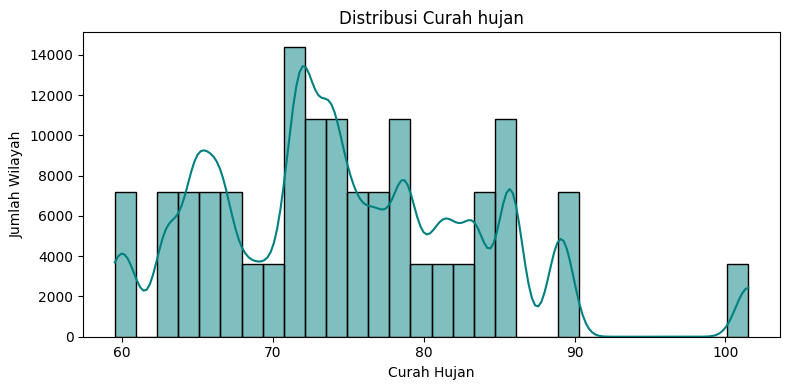

In [29]:
plt.figure(figsize=(8,4))
sns.histplot(dfSpatialFood['Rainfall'], bins=30, kde=True, color='teal')
plt.title('Distribusi Curah hujan')
plt.xlabel('Curah Hujan')
plt.ylabel('Jumlah Wilayah')
plt.tight_layout()
plt.show()

### Melihat data yang sudah dibersihkan

In [30]:
dfSpatialFood.describe()

,X,Y,Slope,Curvature,Aspect,TWI,FA,Drainage,Rainfall
count,144013.000000,144013.000000,144013.000000,1.440130e+05,144013.000000,144013.000000,144013.000000,144013.000000,144013.000000
mean,3.891544,7.374558,58.183881,-2.546770e+06,184.464709,-7.342037,1203.806434,219.714405,74.787190
std,0.027877,0.032503,15.157870,4.010003e+09,101.419126,2.084627,19834.499573,7.057898,8.891749
min,3.831111,7.311389,0.000000,-3.499200e+10,-1.000000,-10.815885,0.000000,203.729300,59.541096
25%,3.868889,7.348056,51.340191,-2.592000e+09,101.309929,-8.653046,0.000000,214.286900,68.140822
50%,3.891667,7.374167,61.980232,0.000000e+00,190.007980,-7.998810,1.000000,220.631300,73.873425
75%,3.913611,7.400556,69.167122,2.592000e+09,270.000000,-6.703169,6.000000,224.191400,81.329315
max,3.954444,7.443056,86.575409,3.888000e+10,359.144897,11.683441,457936.000000,235.421000,101.515616


## 5 Analisis Kategori Susceptibility 🔍🔍🛒

### Menghitung jumlah kategori

In [31]:
dfSpatialFood['SUSCEP'].value_counts()

SUSCEP
Moderate     38013
High         34359
Low          32166
Very_High    23392
No_Flood     16083
Name: count, dtype: int64

### Hasil Boxplot curah hujan berdasarkan kerentanan

C:\Users\ASUS\AppData\Local\Temp\ipykernel_15712\659753773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SUSCEP', y='Rainfall',


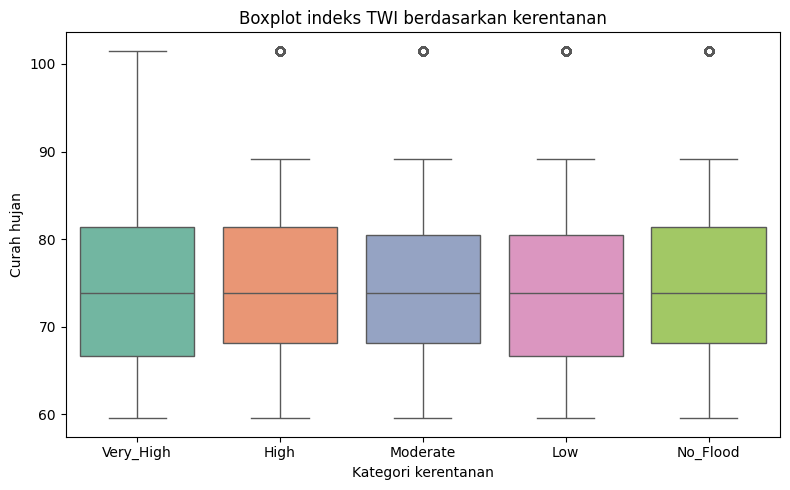

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x='SUSCEP', y='Rainfall',
data=dfSpatialFood, palette='Set2')
plt.title('Boxplot indeks TWI berdasarkan kerentanan')
plt.xlabel('Kategori kerentanan')
plt.ylabel('Curah hujan')
plt.tight_layout()
plt.show()

## 6. Scatter Plot Hubungan Parameter

* Terdapat pola dimana semakin miring dataran maka curah hujan di daerah tersebut makin tinggi

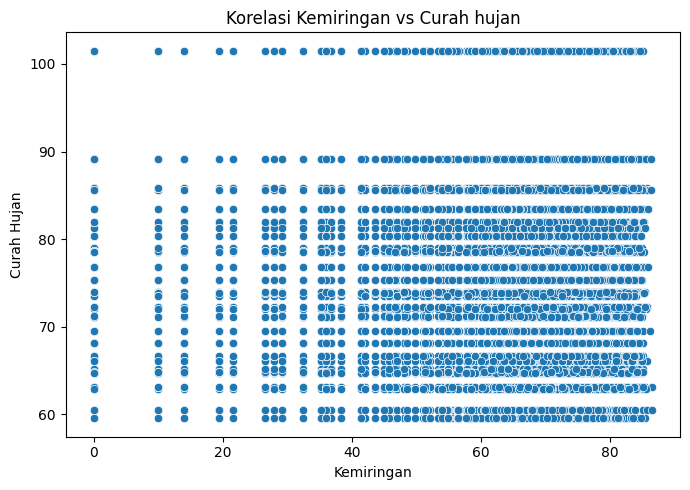

In [33]:
plt.figure(figsize=(7,5))
sns.scatterplot(
 x='Slope', y='Rainfall',
 data=dfSpatialFood
)
plt.title('Korelasi Kemiringan vs Curah hujan')
plt.xlabel('Kemiringan')
plt.ylabel('Curah Hujan')
plt.tight_layout()
plt.show()

## 7 Heatmap Korelasi Parameter

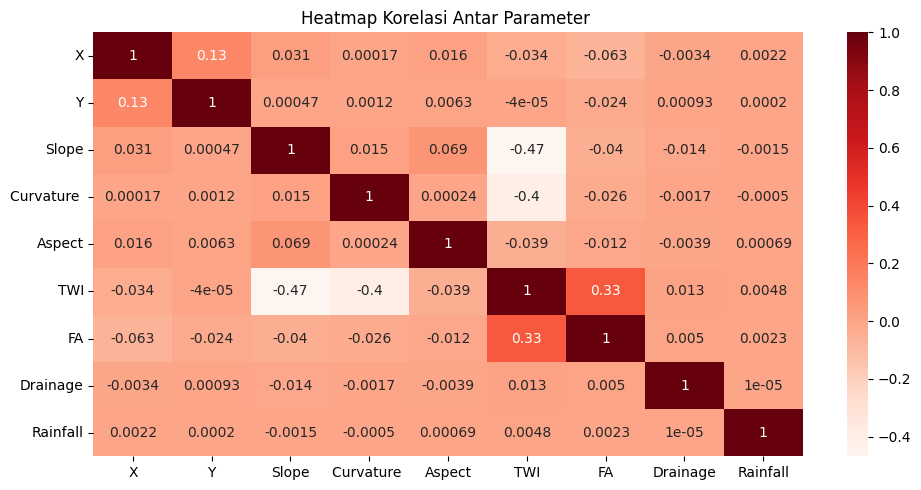

In [34]:
paramNumeric = dfSpatialFood.select_dtypes(include='number')
paramNumeric= paramNumeric.columns.tolist()
corr_matrix = dfSpatialFood[paramNumeric].corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='Reds')
plt.title('Heatmap Korelasi Antar Parameter ')
plt.tight_layout()
plt.show()

## 8 Peta Interaktif Titik Flood